# Example
0) Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Load Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# print the target names
print(list(data.target_names))

# print feature names
print(list(data.feature_names))

#check for metadata
print(data.DESCR)

#check for missing values using pandas
df = pd.DataFrame(data = data, columns = data.feature_names)
df.isnull().any()

#1) What category of the given data frame is the target variable?
# -> categorical, malignant or benign

#How many classes are present in the data? 
# -> 2

#2) What and how many variables are the features? 
# -> around 30 features mostly numerical like perimeter, mean area, ....

#3) Are there missing values in the dataset?
# -> false, so no missing values present.

['malignant', 'benign']
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation o

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

4. Split the data into the train and test partition. Use 30% of the data as test data.
Make sure to keep your analysis reproducible.

In [3]:
from random import random
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.30, random_state = 5)

5) Use the k-nearest neighbor (kNN) classifier of the sklearn.neighbors package.
6) Train the selected model with its default parameters.
Print the model’s default hyperparameters.


In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

#train the model
model.fit(data.data, data.target)

print(model.get_params())


#generate predictions
prediction_results = model.predict(X_test)
print(prediction_results)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
[0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1]


7) Evaluate the selected model:
a. What is the accuracy of your model? 
Around 97 percent
b. What is the confusion matrix of your model?
see output below

0.9707602339181286


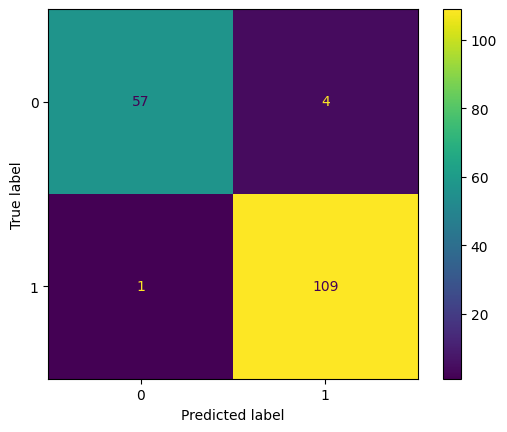

In [5]:
# Evaluate the selected model:

#accuracy
print(model.score(X_test, y_test))

#a.-> accuracy is around 97%

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction_results, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()

plt.show()

In [6]:
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(X_train, y_train)
#Generate Predictions
prediction_results1 = model1.predict(X_test)

#neighbors=np.append(np.array([1,3]),np.arange(5,19))

# Evaluate the Performance of the Model
#Accuracy
print("Score of Model 1: ")
print(model1.score(X_test, y_test))

model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train, y_train)

#Generate Predictions
prediction_results3 = model3.predict(X_test)


# Evaluate the Performance of the Model
#Accuracy
print("Score of Model 3: ")
print(model3.score(X_test, y_test))

for Nneighbors in range (5, 19):
    model5 = KNeighborsClassifier(n_neighbors = Nneighbors)
    model5.fit(X_train, y_train)
    #Generate Predictions
    prediction_results5 = model5.predict(X_test)
    # Evaluate the Performance of the Model
    #Accuracy
    print("Score of Model: ", Nneighbors)
    print(model5.score(X_test, y_test))

# We see below the different accuracies dependent on the various k=neighbors of the Testing Data,
# from 94 to 97percent increase the more k we select

Score of Model 1: 
0.9473684210526315
Score of Model 3: 
0.9415204678362573
Score of Model:  5
0.9473684210526315
Score of Model:  6
0.9590643274853801
Score of Model:  7
0.9532163742690059
Score of Model:  8
0.9649122807017544
Score of Model:  9
0.9590643274853801
Score of Model:  10
0.9766081871345029
Score of Model:  11
0.9707602339181286
Score of Model:  12
0.9766081871345029
Score of Model:  13
0.9707602339181286
Score of Model:  14
0.9766081871345029
Score of Model:  15
0.9707602339181286
Score of Model:  16
0.9707602339181286
Score of Model:  17
0.9707602339181286
Score of Model:  18
0.9707602339181286


{'n_neighbors': 10}
0.9220569620253165


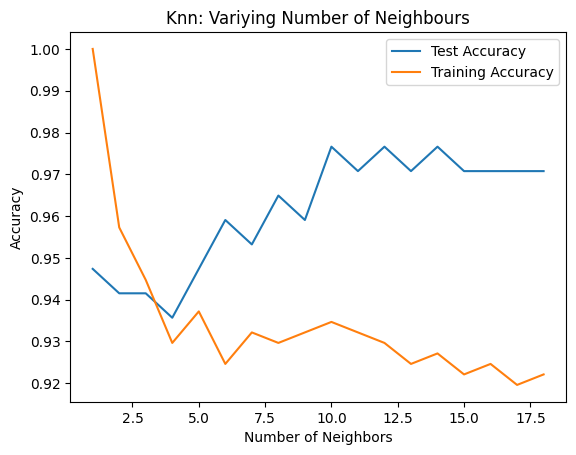

In [7]:

#find the best k 
train_accuracies ={}
test_accuracies = {}

neighbors = np.arange(1,19) 
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors= neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure()
plt.title("Knn: Variying Number of Neighbours")
plt.plot(neighbors, test_accuracies.values(), label = "Test Accuracy")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors":neighbors}
knn_cv = GridSearchCV(knn, param_grid)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

From the evaluation we see a 'best' neighbor estimation with 10 for the test data and an accuracy of around 92%

Give a reason why the model evaluation should be
performed on testing data rather than the training data -> Because we need the model for unseen data and can see better if the model has issues with over/underfitting for new data better.

12) Train your model with the selected k value. Consult the precision and recall values of the model
to make your decision. Is the model with the highest accuracy also the one with sufficient
precision and recall?

In [8]:
#Train model with k=10
model10 = KNeighborsClassifier(n_neighbors=10)
model10.fit(X_train, y_train)
#Generate Predictions
prediction_results10 = model10.predict(X_test)

# confusion matrix with specified model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_results10)

# Evaluattion and Performance of the Model w/ hyperparameter change
#Accuracy
print("The Accuracy Score is: ", model10.score(X_test, y_test))

#Libraries for Precision/Recall Score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Precision
print("The Precision is: ", precision_score(y_test , prediction_results10))

#Recall
print("The Recall is: ", recall_score(y_test , prediction_results10))

# We see for the model with k=10: 
# accuracy of 97% , precision of 96% and Recall 100%.

The Accuracy Score is:  0.9766081871345029
The Precision is:  0.9649122807017544
The Recall is:  1.0


13) Select a classification model from the scikit-learn package.
14) Repeat steps 6 to 7 accordingly.

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
The Accuracy is: 0.9649122807017544
The Precision is:  0.9482758620689655
The Recall is:  1.0


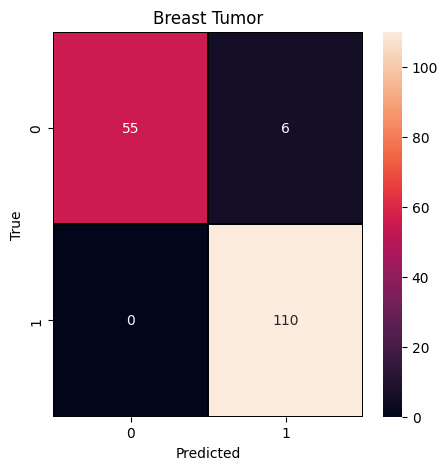

In [9]:
#support vector machine for classification 
from sklearn import svm
import seaborn as sns 
SVM = svm.SVC()

#default hyperparameters of svm
print(SVM.get_params())

#train model
SVM.fit(X_train, y_train)

#prediction of test data
prediction_resultsSVM = SVM.predict(X_test)

#Accuracy
print("The Accuracy is:", SVM.score(X_test, y_test))

#Precision
from sklearn.metrics import precision_score
print("The Precision is: ", precision_score(y_test , prediction_resultsSVM))

#Recall
from sklearn.metrics import recall_score
print("The Recall is: ", recall_score(y_test , prediction_resultsSVM))

#Confusion Matrix
cmSVM= confusion_matrix(y_test, prediction_resultsSVM)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cmSVM,annot = True, linewidths= 0.1, linecolor="black", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Breast Tumor")
plt.show()

15) Does your selected model perform better than the k-nearest neighbor classifier? Please
elaborate in a comment, and print and/or plot your findings.
-> In my case we have less accuracy with 96% and precision of 94% but nevertheless quite good classification was achieved with SVM aswell. Maybe we can use a ROC curve to distinguish between different models. 

**Regression Model**
Train and evaluate regression models
Train and evaluate a regression model. You are going to predict the disease progression one year after
baseline from diabetes patients.
1) Use the diabetes dataset

In [10]:
#load diabetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

2) Print a correlation matrix and observe the relations between the features.

In [11]:
df1 = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
corrMatrix = df1.corr()
print("\n Correlation Matrix:\n",corrMatrix)

#we can see that there are some more or less correlation in the different features with each other e.g. with -0.73 for s3 to s4 having a negativ correlation. Also s1 and s2 
#do have a strong but positive corr.


 Correlation Matrix:
           age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270774  0.301731  
sex  0.332115  0.149916  0.208133  
bmi  0.413807  0.4461

Data Inspectiond and Missing Values

In [12]:
# print some characteristic information of the dataset 
print(diabetes.DESCR)

#check for missing values using pandas df
df1.isnull().any()

#Next to the 10 attr. and the quantitaive measure as target value of disease progression one year after baseline within column 11 we notice no missing values

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

age    False
sex    False
bmi    False
bp     False
s1     False
s2     False
s3     False
s4     False
s5     False
s6     False
dtype: bool

Again we split Data into Train and Test 30%

In [13]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.30, random_state = 60)

Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()

Train the Linear Regression Model

In [20]:
# Now we train the model with our training data
model_linear.fit(X_train, y_train)

# we print our default hyperparameters
print("Hyperparameter of the Model :",model_linear.get_params())

# and we do the predication with our test data and print them
LinearPrediction= model_linear.predict(X_test)
print(LinearPrediction)

Hyperparameter of the Model : {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
[172.60040851 141.73845181 138.10152366  87.2632975   66.93645312
 225.04254488 187.73274972 231.75098014 216.77810833 140.44409559
 127.07169846 173.12814155 116.47015052 206.75068494 153.00218188
 144.4146491  102.77837227 229.83828109 133.09336442  86.10076956
 201.89787329 154.30377249 214.47442723 100.14919887 164.22524412
 248.42815749 227.01539186 156.56323831 148.10159716  87.26360487
 183.94705025 153.99539539 120.24659526 135.29499911 151.05853681
 122.38998877 144.35884571 124.01081816 111.08819429 164.85734995
 174.27904628 123.52160387  94.29384007 187.19821956 174.85481345
 213.3347742   63.34640694 110.29906749 115.98653762  64.29319918
  95.61640715 161.19173887 260.16322756 165.53741815 205.36702832
 169.04029709 177.56946385 164.67004226 228.32426579 164.75413204
  79.27487789 214.30204218 115.383901   107.28421586 201.13679859
 279.40941

Its time to evaluate our prediction

In [21]:
# We load additional packages 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absoloute Errror
print("The mean Absoloute Error is:", mean_absolute_error(y_test, LinearPrediction))

# Mean Squared Error
print("The Mean Squared Error is: ", mean_squared_error(y_test, LinearPrediction))

# R-Squared Score
print("The R-Squared Score is: ",r2_score(y_test, LinearPrediction))


The mean Absoloute Error is: 43.22811526665676
The Mean Squared Error is:  2925.173770977768
The R-Squared Score is:  0.5222762446552212
